In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Load the data
df = pd.read_csv('AusApparalSales4thQrt2020.csv')




In [211]:
# Inspecting the first few rows of the DataFrame
print(df.head())

# Displaying the last few rows of the DataFrame
print(df.tail())

# Providing information about the DataFrame, including data types and non-null counts
print(df.info())

# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, etc.
print(df.describe())

# Displaying datatypes of the columns
df.dtypes


         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
             Date        Time State     Group  Unit  Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   o

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [212]:
# Access the first row using iloc
result_iloc_0 = df.iloc[0]

# Display the result for df.iloc[0]
print("Result for df.iloc[0]:")
print(result_iloc_0)
print()

# Access the eleventh row using iloc
result_iloc_10 = df.iloc[10]

# Display the result for df.iloc[10]
print("Result for df.iloc[10]:")
print(result_iloc_10)

Result for df.iloc[0]:
Date     1-Oct-2020
Time        Morning
State            WA
Group          Kids
Unit              8
Sales         20000
Name: 0, dtype: object

Result for df.iloc[10]:
Date     1-Oct-2020
Time        Evening
State            WA
Group         Women
Unit              3
Sales          7500
Name: 10, dtype: object


In [213]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [214]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())




Duplicate Rows:
0


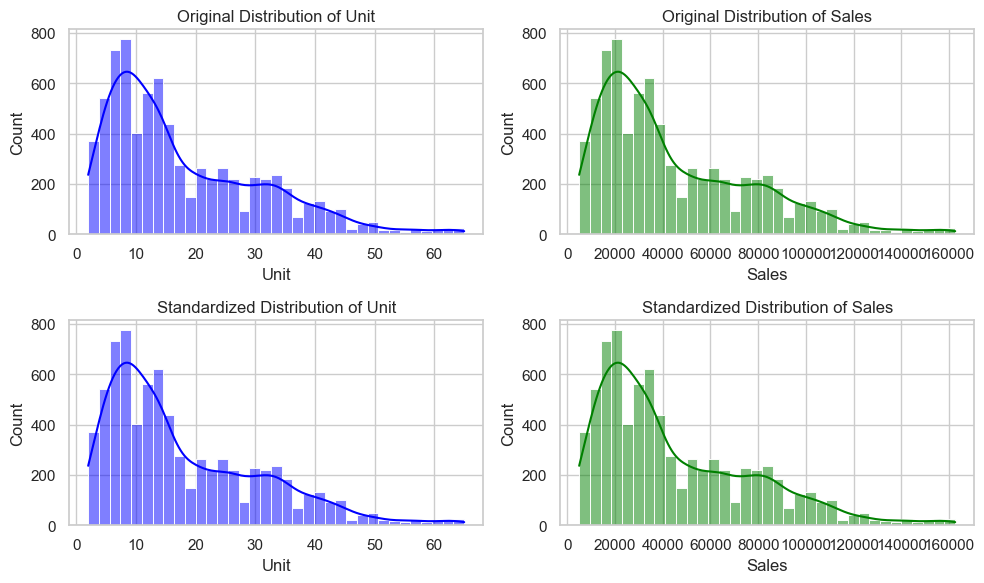

In [215]:

# Plot the distribution of 'Unit' and 'Sales' columns
plt.figure(figsize=(10, 6))

# Original Data
plt.subplot(2, 2, 1)
sns.histplot(df['Unit'], kde=True, color='blue')
plt.title('Original Distribution of Unit')

plt.subplot(2, 2, 2)
sns.histplot(df['Sales'], kde=True, color='green')
plt.title('Original Distribution of Sales')

# Standardized Data
plt.subplot(2, 2, 3)
sns.histplot(df['Unit'], kde=True, color='blue')
plt.title('Standardized Distribution of Unit')

plt.subplot(2, 2, 4)
sns.histplot(df['Sales'], kde=True, color='green')
plt.title('Standardized Distribution of Sales')

plt.tight_layout()
plt.show()



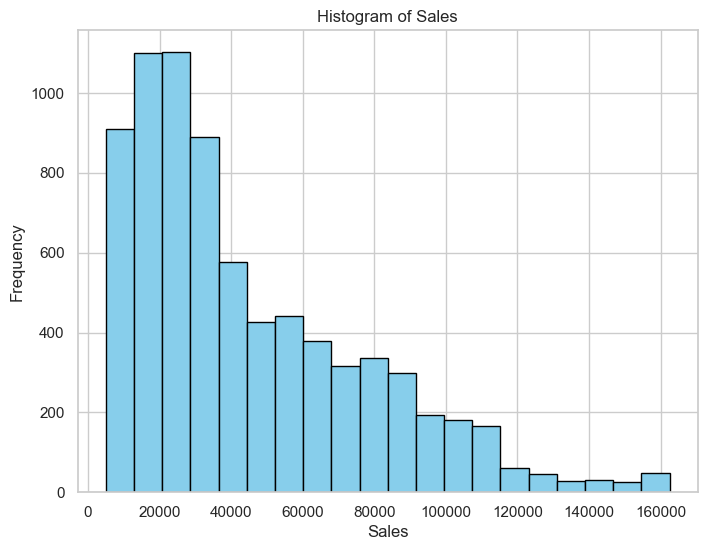

In [216]:
# Select a numerical column to plot its histogram
column_to_plot = 'Sales'

# Plot histogram using Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(df[column_to_plot], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Missing Values per Column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Missing Values per Column after handling:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


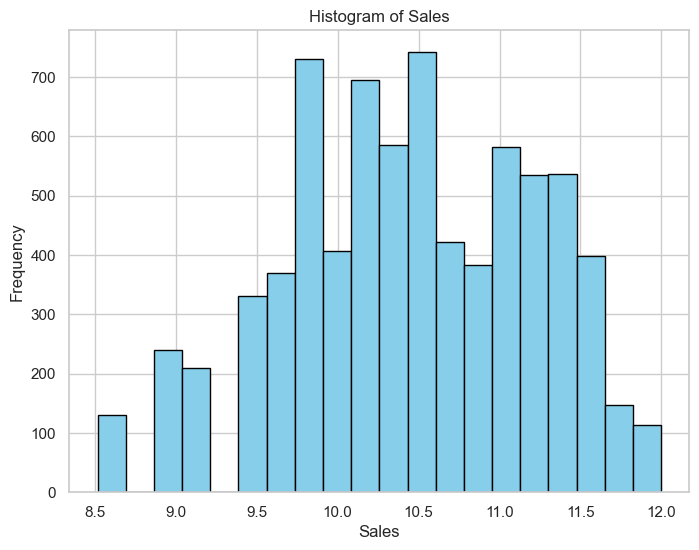

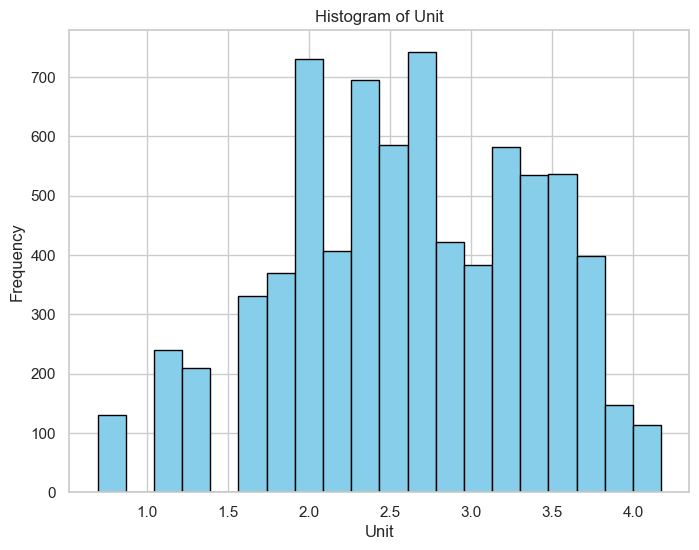

In [217]:
import matplotlib.pyplot as plt




df['Sales'] = np.log(df['Sales'])
df['Unit'] = np.log(df['Unit'])




# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Handle missing values by dropping rows with missing values
df.dropna(subset=['Unit', 'Sales'], inplace=True)

# Check for missing values again
missing_values_after = df.isnull().sum()
print("\nMissing Values per Column after handling:")
print(missing_values_after)



# Select numerical columns to plot histograms
columns_to_plot = ['Sales', 'Unit']

# Plot histograms using Matplotlib
for column_to_plot in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column_to_plot], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_to_plot}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    
    

In [218]:


# Display the original data
print("Original DataFrame:")
print(df)

# Select columns to normalize (assuming 'columns_to_normalize' contains the column names)
columns_to_normalize = ['Unit', 'Sales']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized data
print("\nNormalized DataFrame:")
print(df)


Original DataFrame:
             Date        Time State     Group      Unit      Sales
0      1-Oct-2020     Morning    WA      Kids  2.079442   9.903488
1      1-Oct-2020     Morning    WA       Men  2.079442   9.903488
2      1-Oct-2020     Morning    WA     Women  1.386294   9.210340
3      1-Oct-2020     Morning    WA   Seniors  2.708050  10.532096
4      1-Oct-2020   Afternoon    WA      Kids  1.098612   8.922658
...           ...         ...   ...       ...       ...        ...
7555  30-Dec-2020   Afternoon   TAS   Seniors  2.639057  10.463103
7556  30-Dec-2020     Evening   TAS      Kids  2.708050  10.532096
7557  30-Dec-2020     Evening   TAS       Men  2.708050  10.532096
7558  30-Dec-2020     Evening   TAS     Women  2.397895  10.221941
7559  30-Dec-2020     Evening   TAS   Seniors  2.564949  10.388995

[7560 rows x 6 columns]

Normalized DataFrame:
             Date        Time State     Group      Unit     Sales
0      1-Oct-2020     Morning    WA      Kids  0.398219  0.398

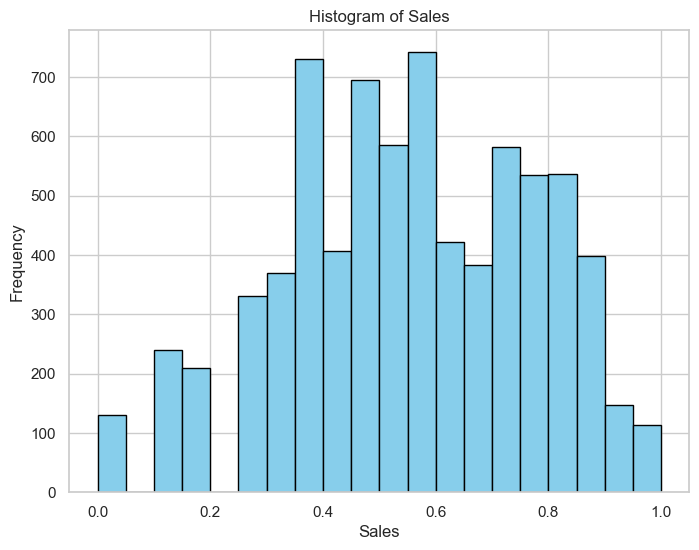

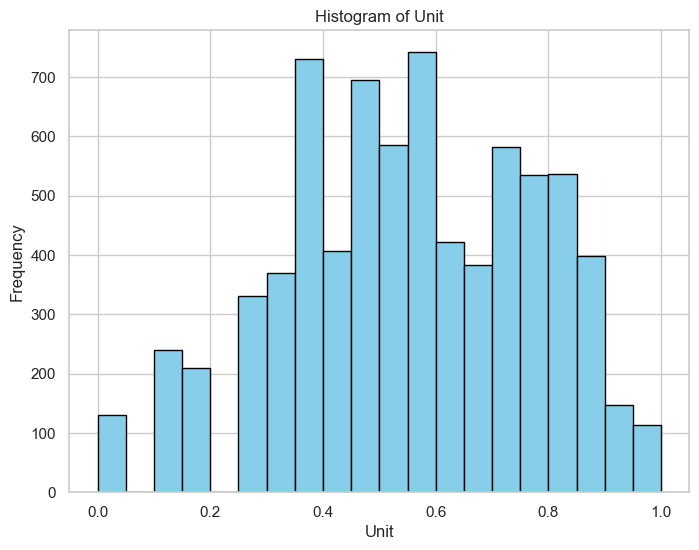

In [219]:
# Select numerical columns to plot histograms
columns_to_plot = ['Sales', 'Unit']

# Plot histograms using Matplotlib
for column_to_plot in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column_to_plot], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_to_plot}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    

In [220]:


# Determine the states that are generating the highest revenues 
# Group the data by 'State' and calculate total sales revenue for each state
state_revenue = df.groupby('State')['Sales'].sum()

# Sort the states based on total sales revenue in descending order
state_revenue_sorted = state_revenue.sort_values(ascending=False)

# Display the states generating the highest revenues
print("States generating the highest revenues:")
print(state_revenue_sorted.head())





States generating the highest revenues:
State
VIC    910.807852
NSW    801.160914
SA     723.842547
QLD    532.320619
TAS    411.435657
Name: Sales, dtype: float64


In [221]:
# Victoria leading in revenue generation followed by New South Wales, South Australia, Queensland, and Tasmania

In [222]:



### additional feature engineering processing (Data Analysis)to train the data 



#●	Determine which group is generating the highest sales, and which group is generating the lowest sales.
#●	Determine which state is generating the highest sales, and which state is generating the lowest sales.
#●	Generate weekly, monthly and quarterly reports for the analysis made.


# Task 1: 
group_sales = df.groupby('Group')['Sales'].sum()
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

print("Group generating the highest sales:", highest_sales_group)
print("Group generating the lowest sales:", lowest_sales_group)

# Task 2:
state_sales = df.groupby('State')['Sales'].sum()
highest_sales_state = state_sales.idxmax()
lowest_sales_state = state_sales.idxmin()

print("\nState generating the highest sales:", highest_sales_state)
print("State generating the lowest sales:", lowest_sales_state)


# Task 3:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregating sales data by different time intervals
daily_sales = df.groupby(pd.Grouper(key='Date', freq='D')).agg({
    'Sales': 'sum',  # Total sales amount
    'Unit': 'sum',   # Total units sold
}).reset_index()

weekly_sales = df.groupby(pd.Grouper(key='Date', freq='W')).agg({
    'Sales': 'sum',
    'Unit': 'sum',
}).reset_index()

monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M')).agg({
    'Sales': 'sum',
    'Unit': 'sum',
}).reset_index()

# Display the aggregated data
print("\nDaily Sales:")
print(daily_sales)

print("\nWeekly Sales:")
print(weekly_sales)

print("\nMonthly Sales:")
print(monthly_sales)


Group generating the highest sales:  Men
Group generating the lowest sales:  Seniors

State generating the highest sales:  VIC
State generating the lowest sales:  WA

Daily Sales:
         Date      Sales       Unit
0  2020-10-01  46.710888  46.710888
1  2020-10-02  46.915678  46.915678
2  2020-10-03  47.546685  47.546685
3  2020-10-04  48.124700  48.124700
4  2020-10-05  47.975442  47.975442
..        ...        ...        ...
86 2020-12-26  52.348662  52.348662
87 2020-12-27  52.215742  52.215742
88 2020-12-28  52.334171  52.334171
89 2020-12-29  52.529761  52.529761
90 2020-12-30  53.146944  53.146944

[91 rows x 3 columns]

Weekly Sales:
         Date       Sales        Unit
0  2020-10-04  189.297950  189.297950
1  2020-10-11  335.537929  335.537929
2  2020-10-18  332.067511  332.067511
3  2020-10-25  334.580625  334.580625
4  2020-11-01  274.835529  274.835529
5  2020-11-08  277.228340  277.228340
6  2020-11-15  280.831861  280.831861
7  2020-11-22  280.372877  280.372877
8  2020-

C:\Users\martinin\AppData\Local\Temp\ipykernel_1892\4139301125.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M')).agg({


In [223]:
# Calculate sales per unit
df['Sales_Per_Unit'] = df['Sales'] / df['Unit']

# Create binary variables for each group
binary_groups = pd.get_dummies(df['Group'], prefix='Group')

In [224]:
# Concatenate the binary variables with the original DataFrame
sales_data_with_binary = pd.concat([df, binary_groups], axis=1)

In [225]:
# Display the aggregated data
print("\nsales_data_with_binary :")
print(sales_data_with_binary )


sales_data_with_binary :
           Date        Time State     Group      Unit     Sales  \
0    2020-10-01     Morning    WA      Kids  0.398219  0.398219   
1    2020-10-01     Morning    WA       Men  0.398219  0.398219   
2    2020-10-01     Morning    WA     Women  0.199109  0.199109   
3    2020-10-01     Morning    WA   Seniors  0.578789  0.578789   
4    2020-10-01   Afternoon    WA      Kids  0.116471  0.116471   
...         ...         ...   ...       ...       ...       ...   
7555 2020-12-30   Afternoon   TAS   Seniors  0.558970  0.558970   
7556 2020-12-30     Evening   TAS      Kids  0.578789  0.578789   
7557 2020-12-30     Evening   TAS       Men  0.578789  0.578789   
7558 2020-12-30     Evening   TAS     Women  0.489696  0.489696   
7559 2020-12-30     Evening   TAS   Seniors  0.537683  0.537683   

      Sales_Per_Unit  Group_ Kids  Group_ Men  Group_ Seniors  Group_ Women  
0                1.0         True       False           False         False  
1            

In [226]:
# Extract day, month, and year from the 'Date' column
sales_data_with_binary['Day'] = sales_data_with_binary['Date'].dt.day
sales_data_with_binary['Month'] = sales_data_with_binary['Date'].dt.month
sales_data_with_binary['Year'] = sales_data_with_binary['Date'].dt.year

# Display the updated DataFrame
print("\nDataFrame with Day, Month, and Year:")
print(sales_data_with_binary)





DataFrame with Day, Month, and Year:
           Date        Time State     Group      Unit     Sales  \
0    2020-10-01     Morning    WA      Kids  0.398219  0.398219   
1    2020-10-01     Morning    WA       Men  0.398219  0.398219   
2    2020-10-01     Morning    WA     Women  0.199109  0.199109   
3    2020-10-01     Morning    WA   Seniors  0.578789  0.578789   
4    2020-10-01   Afternoon    WA      Kids  0.116471  0.116471   
...         ...         ...   ...       ...       ...       ...   
7555 2020-12-30   Afternoon   TAS   Seniors  0.558970  0.558970   
7556 2020-12-30     Evening   TAS      Kids  0.578789  0.578789   
7557 2020-12-30     Evening   TAS       Men  0.578789  0.578789   
7558 2020-12-30     Evening   TAS     Women  0.489696  0.489696   
7559 2020-12-30     Evening   TAS   Seniors  0.537683  0.537683   

      Sales_Per_Unit  Group_ Kids  Group_ Men  Group_ Seniors  Group_ Women  \
0                1.0         True       False           False         False   

In [227]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(sales_data_with_binary.duplicated().sum())


Duplicate Rows:
0


In [228]:
# Checking for missing values
missing_values = sales_data_with_binary.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Date                0
Time                0
State               0
Group               0
Unit                0
Sales               0
Sales_Per_Unit    130
Group_ Kids         0
Group_ Men          0
Group_ Seniors      0
Group_ Women        0
Day                 0
Month               0
Year                0
dtype: int64


In [229]:
# Drop the 'Sales_Per_Unit' column
sales_data_with_binary.drop(columns=['Sales_Per_Unit'], inplace=True)

# Display the DataFrame after dropping the column
print(df)

           Date        Time State     Group      Unit     Sales  \
0    2020-10-01     Morning    WA      Kids  0.398219  0.398219   
1    2020-10-01     Morning    WA       Men  0.398219  0.398219   
2    2020-10-01     Morning    WA     Women  0.199109  0.199109   
3    2020-10-01     Morning    WA   Seniors  0.578789  0.578789   
4    2020-10-01   Afternoon    WA      Kids  0.116471  0.116471   
...         ...         ...   ...       ...       ...       ...   
7555 2020-12-30   Afternoon   TAS   Seniors  0.558970  0.558970   
7556 2020-12-30     Evening   TAS      Kids  0.578789  0.578789   
7557 2020-12-30     Evening   TAS       Men  0.578789  0.578789   
7558 2020-12-30     Evening   TAS     Women  0.489696  0.489696   
7559 2020-12-30     Evening   TAS   Seniors  0.537683  0.537683   

      Sales_Per_Unit  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                1.0  
...              ...  
7555             1.0  
7556       

Basic Statistics:
                                Date         Unit        Sales          Day  \
count                           7560  7560.000000  7560.000000  7560.000000   
mean   2020-11-15 04:00:00.000000256     0.554060     0.554060    15.500000   
min              2020-10-01 00:00:00     0.000000     0.000000     1.000000   
25%              2020-10-23 00:00:00     0.398219     0.398219     8.000000   
50%              2020-11-15 12:00:00     0.558970     0.558970    15.500000   
75%              2020-12-08 00:00:00     0.736792     0.736792    23.000000   
max              2020-12-30 00:00:00     1.000000     1.000000    30.000000   
std                              NaN     0.220339     0.220339     8.656014   

             Month    Year  
count  7560.000000  7560.0  
mean     11.000000  2020.0  
min      10.000000  2020.0  
25%      10.000000  2020.0  
50%      11.000000  2020.0  
75%      12.000000  2020.0  
max      12.000000  2020.0  
std       0.816551     0.0  


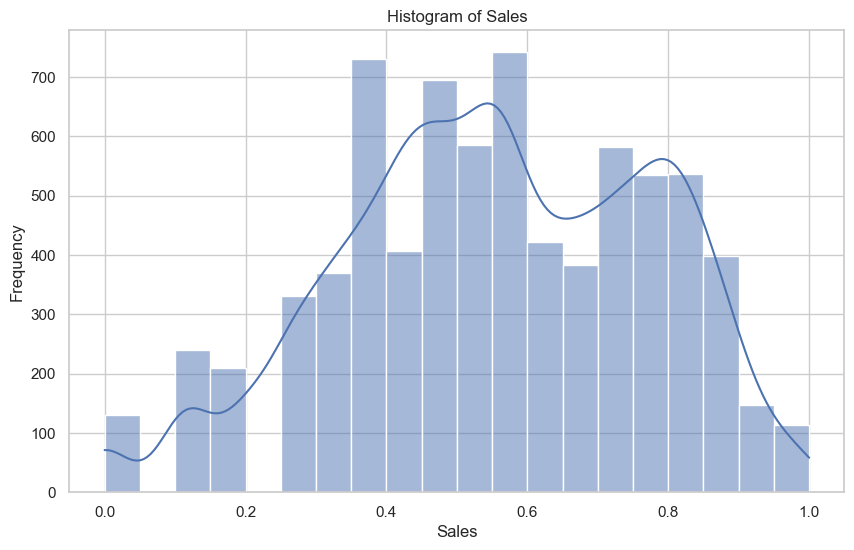

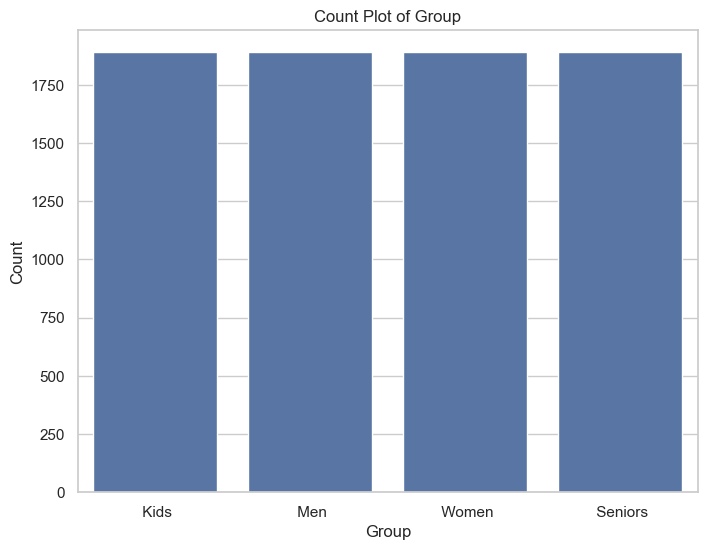


Missing Values per Column:
Date              0
Time              0
State             0
Group             0
Unit              0
Sales             0
Group_ Kids       0
Group_ Men        0
Group_ Seniors    0
Group_ Women      0
Day               0
Month             0
Year              0
dtype: int64


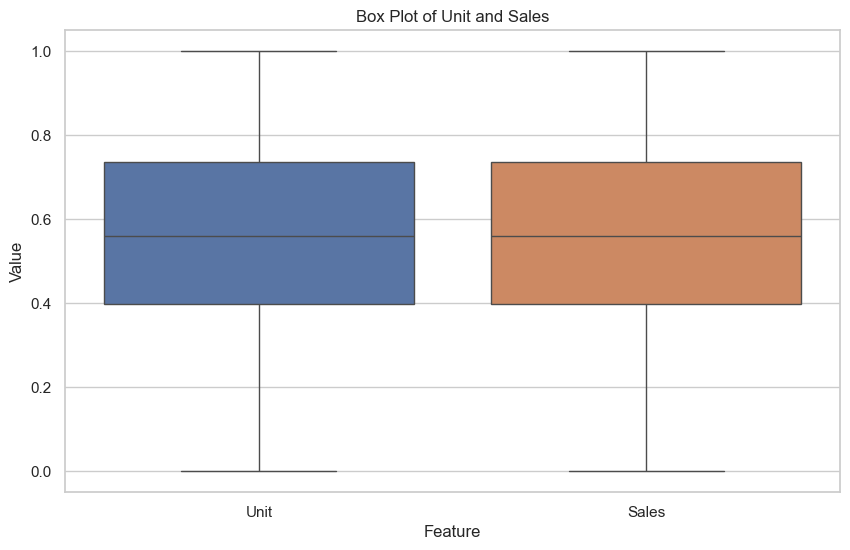

<Figure size 800x600 with 0 Axes>

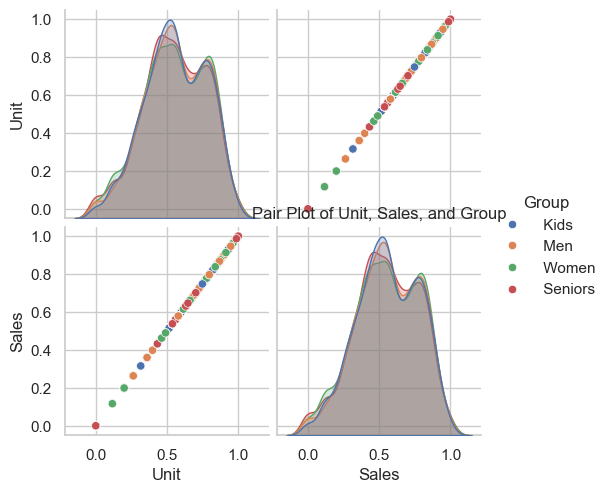

In [230]:

# Basic statistics
print("Basic Statistics:")
print(sales_data_with_binary.describe())

# Data distribution
plt.figure(figsize=(10, 6))
sns.histplot(sales_data_with_binary['Sales'], bins=20, kde=True)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=sales_data_with_binary, x='Group')
plt.title('Count Plot of Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

# Missing values
print("\nMissing Values per Column:")
print(sales_data_with_binary.isnull().sum())

# Outlier detection (example using box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Unit', 'Sales']])
plt.title('Box Plot of Unit and Sales')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

# Feature relationships
plt.figure(figsize=(8, 6))
sns.pairplot(data=sales_data_with_binary[['Unit', 'Sales', 'Group']], hue='Group')
plt.title('Pair Plot of Unit, Sales, and Group')
plt.show()

In [231]:
#Based on these statistics: now we have data ready for modeling 

#Unit and Sales: Both columns have a mean around 0.554 with a standard deviation of approximately 0.220. The minimum and maximum values are between 0 and 1, suggesting that they might be normalized or scaled features.
#Day: Ranges from 1 to 30, representing the days of the month.
#Month: Ranges from 10 to 12, representing the months of October, November, and December.
#Year: Has a constant value of 2020, indicating that all observations are from the year 2020.
#These statistics provide a summary of the distribution of your numerical data, which can be useful for understanding the dataset's characteristics and for making decisions during data analysis and modeling.

In [232]:


from sklearn.metrics import r2_score
####check the accuracy 


# Separate the target variable
X = sales_data_with_binary.drop(columns=['Sales','Time','Date','State','Group'])
y = sales_data_with_binary['Sales']



# Inspecting the first few rows of the DataFrame
print(X.head())
# Inspecting the first few rows of the DataFrame
print(y.head())



# Train your model using X_transformed and y
# For example:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
 

    
# Predict sales using the trained model and transformed features
y_pred = model.predict(X)

# Calculate R-squared score
r2 = r2_score(y, y_pred)
print(f"R-squared Score: {r2:.4f}")
    


       Unit  Group_ Kids  Group_ Men  Group_ Seniors  Group_ Women  Day  \
0  0.398219         True       False           False         False    1   
1  0.398219        False        True           False         False    1   
2  0.199109        False       False           False          True    1   
3  0.578789        False       False            True         False    1   
4  0.116471         True       False           False         False    1   

   Month  Year  
0     10  2020  
1     10  2020  
2     10  2020  
3     10  2020  
4     10  2020  
0    0.398219
1    0.398219
2    0.199109
3    0.578789
4    0.116471
Name: Sales, dtype: float64
R-squared Score: 1.0000


In [233]:
# Inspecting the first few rows of the DataFrame
print(sales_data_with_binary.head())

# Displaying the last few rows of the DataFrame
print(sales_data_with_binary.tail())

# Providing information about the DataFrame, including data types and non-null counts
print(sales_data_with_binary.info())

# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, etc.
print(sales_data_with_binary.describe())

# Displaying datatypes of the columns
sales_data_with_binary.dtypes

        Date        Time State     Group      Unit     Sales  Group_ Kids  \
0 2020-10-01     Morning    WA      Kids  0.398219  0.398219         True   
1 2020-10-01     Morning    WA       Men  0.398219  0.398219        False   
2 2020-10-01     Morning    WA     Women  0.199109  0.199109        False   
3 2020-10-01     Morning    WA   Seniors  0.578789  0.578789        False   
4 2020-10-01   Afternoon    WA      Kids  0.116471  0.116471         True   

   Group_ Men  Group_ Seniors  Group_ Women  Day  Month  Year  
0       False           False         False    1     10  2020  
1        True           False         False    1     10  2020  
2       False           False          True    1     10  2020  
3       False            True         False    1     10  2020  
4       False           False         False    1     10  2020  
           Date        Time State     Group      Unit     Sales  Group_ Kids  \
7555 2020-12-30   Afternoon   TAS   Seniors  0.558970  0.558970        Fa

Date              datetime64[ns]
Time                      object
State                     object
Group                     object
Unit                     float64
Sales                    float64
Group_ Kids                 bool
Group_ Men                  bool
Group_ Seniors              bool
Group_ Women                bool
Day                        int32
Month                      int32
Year                       int32
dtype: object

In [234]:
######split train 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2.1743768185454913e-31


In [235]:
#####
#A Mean Squared Error (MSE) value of approximately 
#indicates an extremely small error between the actual and predicted values. In fact, this value is close to zero, suggesting that the model's predictions are nearly perfect and essentially match the actual values with very little deviation.
#Similar to an R-squared value of 1.0000, an MSE value this close to zero may indicate potential overfitting, especially if it's accompanied by an R-squared value of 1.0000. Overfitting occurs when a model learns to capture noise in the training data rather than the underlying patterns, resulting in poor generalization to new data.

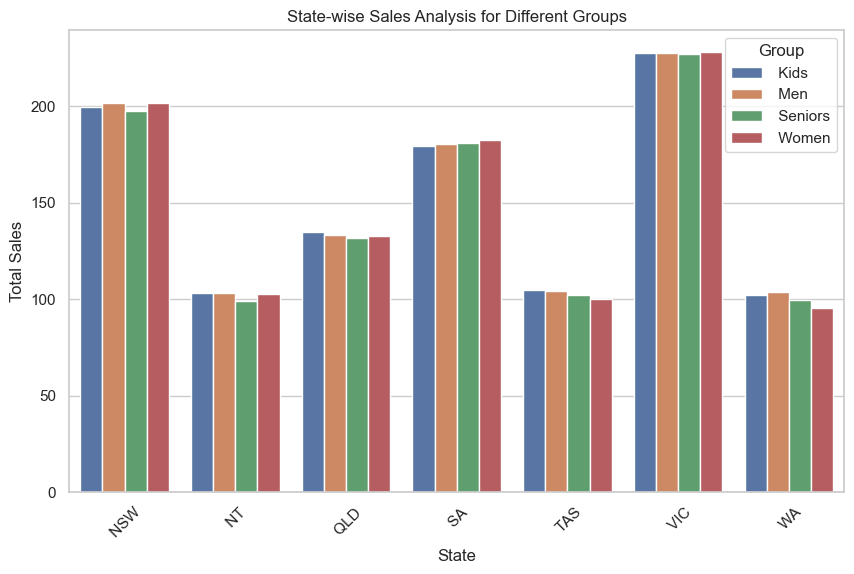

In [236]:

#○	State-wise sales analysis for different groups (kids, women, men, and seniors) 




# Group by 'State' and 'Group', and calculate the sum of 'Sales'
grouped_data = sales_data_with_binary.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Use Seaborn to create a visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='State', y='Sales', hue='Group')
plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.show()





In [237]:
 #Each bar will represent the total sales, and different colors will represent different groups. The legend will indicate which color corresponds to which group.

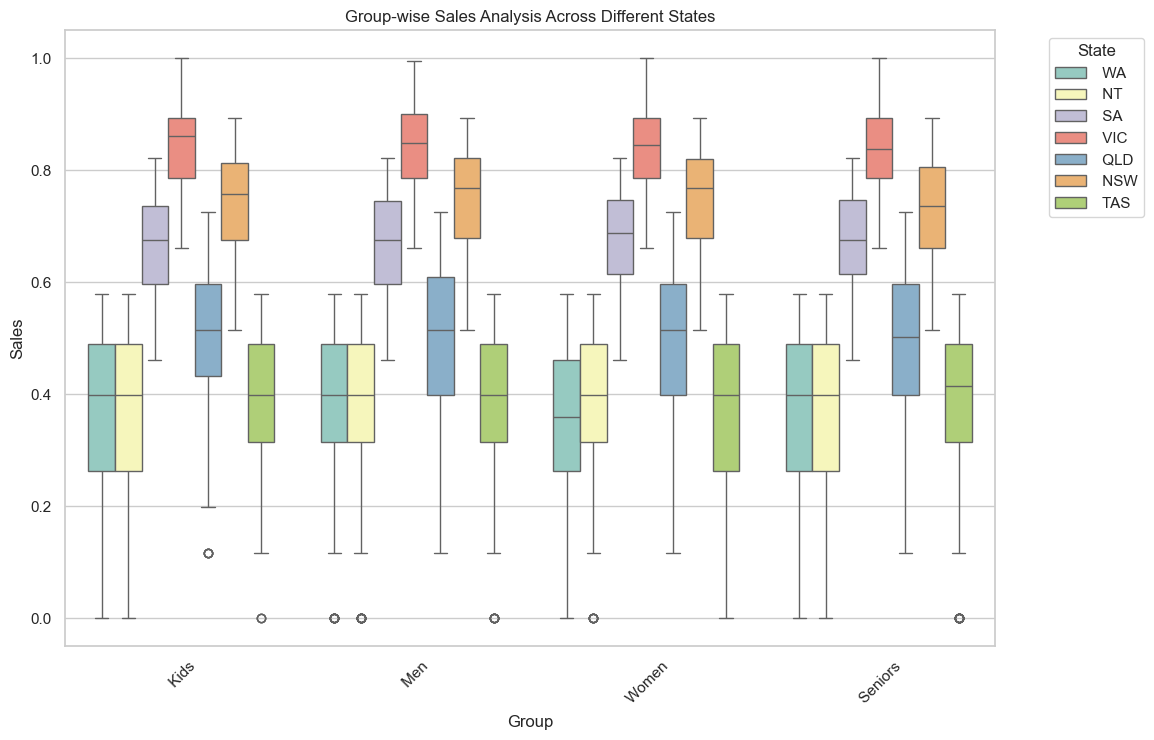

In [238]:
# Create a box plot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Group', y='Sales', hue='State', palette='Set3')
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [239]:
#Each box represents the distribution of sales for a particular group across different states.
#The horizontal line inside each box represents the median value of sales for that group across states.
#The whiskers extend from the quartiles to show the range of the data, with potential outliers indicated as individual points beyond the whiskers.

           Date        Time State     Group      Unit     Sales  Group_ Kids  \
0    2020-10-01     Morning    WA      Kids  0.398219  0.398219         True   
1    2020-10-01     Morning    WA       Men  0.398219  0.398219        False   
2    2020-10-01     Morning    WA     Women  0.199109  0.199109        False   
3    2020-10-01     Morning    WA   Seniors  0.578789  0.578789        False   
4    2020-10-01   Afternoon    WA      Kids  0.116471  0.116471         True   
...         ...         ...   ...       ...       ...       ...          ...   
7555 2020-12-30   Afternoon   TAS   Seniors  0.558970  0.558970        False   
7556 2020-12-30     Evening   TAS      Kids  0.578789  0.578789         True   
7557 2020-12-30     Evening   TAS       Men  0.578789  0.578789        False   
7558 2020-12-30     Evening   TAS     Women  0.489696  0.489696        False   
7559 2020-12-30     Evening   TAS   Seniors  0.537683  0.537683        False   

      Group_ Men  Group_ Seniors  Group

C:\Users\martinin\AppData\Local\Temp\ipykernel_1892\2841369375.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time', y='Sales', data=time_sales, palette='Set2')


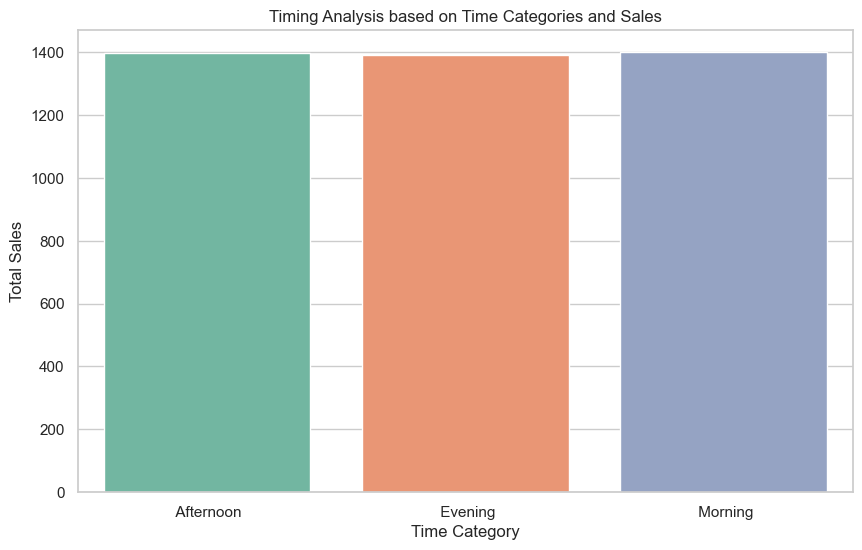

In [240]:


#○	Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest



# Convert 'Date' column to datetime format
sales_data_with_binary['Date'] = pd.to_datetime(sales_data_with_binary['Date'])

# Convert 'Time' column to binary values
time_dummies = pd.get_dummies(sales_data_with_binary['Time'])

# Concatenate the dummy variables with the original DataFrame
sales_data_with_binary = pd.concat([sales_data_with_binary, time_dummies], axis=1)

print(sales_data_with_binary)


# Grouping the data by time categories and summing up the sales
time_sales = sales_data_with_binary.groupby('Time')['Sales'].sum().reset_index()

# Displaying the result
print(time_sales)

# Set Seaborn style
sns.set_style("whitegrid")

# Plotting the timing analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Time', y='Sales', data=time_sales, palette='Set2')
plt.title('Timing Analysis based on Time Categories and Sales')
plt.xlabel('Time Category')
plt.ylabel('Total Sales')
plt.show()

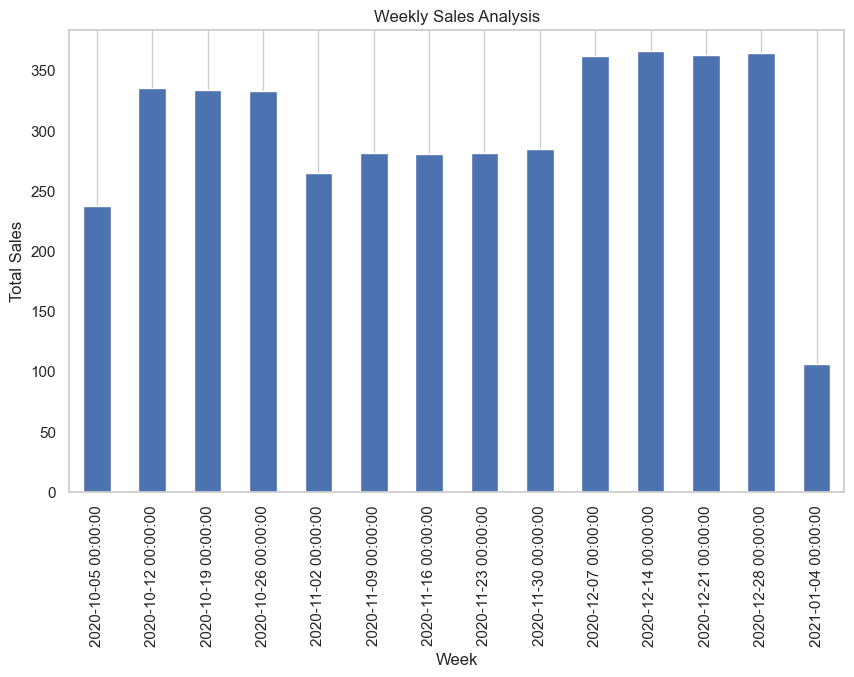

In [241]:
# Weekly analysis
weekly_sales = sales_data_with_binary.resample('W-Mon', on='Date')['Sales'].sum()
weekly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Sales Analysis')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()


C:\Users\martinin\AppData\Local\Temp\ipykernel_1892\2172677197.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data_with_binary.resample('M', on='Date')['Sales'].sum()


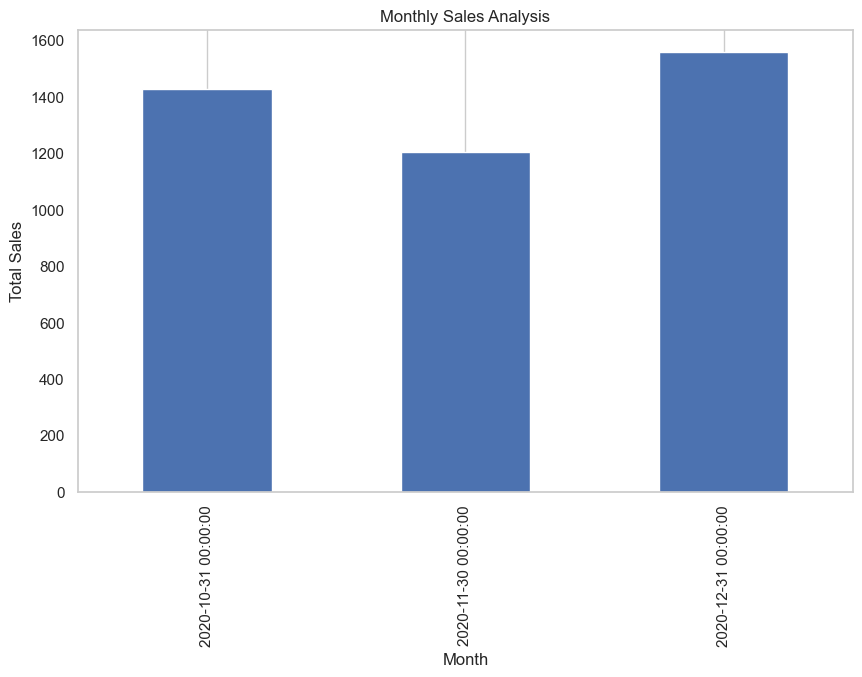

In [242]:

# Monthly analysis
monthly_sales = sales_data_with_binary.resample('M', on='Date')['Sales'].sum()
monthly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()


C:\Users\martinin\AppData\Local\Temp\ipykernel_1892\615768278.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = sales_data_with_binary.resample('Q', on='Date')['Sales'].sum()


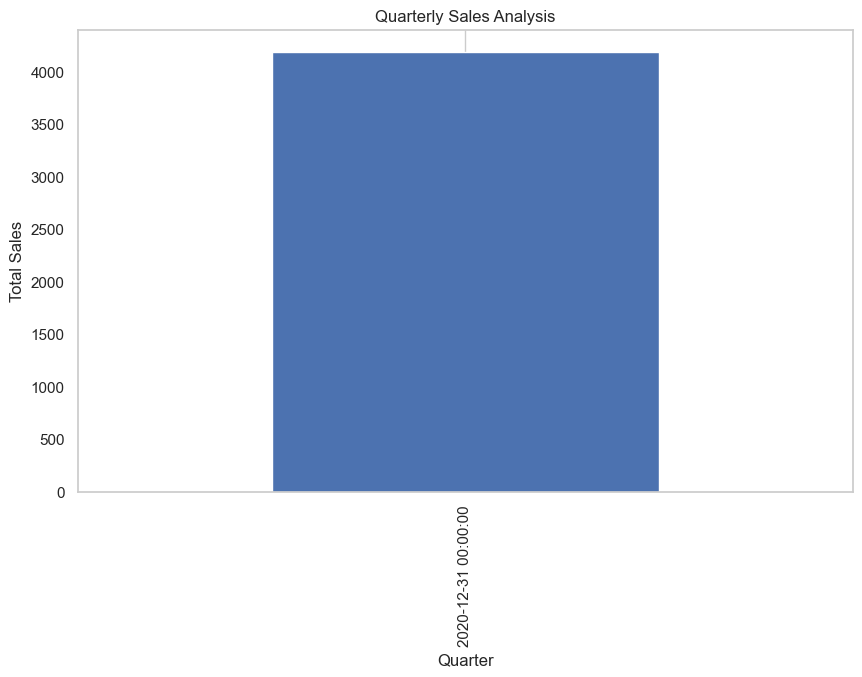

In [243]:

# Quarterly analysis
quarterly_sales = sales_data_with_binary.resample('Q', on='Date')['Sales'].sum()
quarterly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Quarterly Sales Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

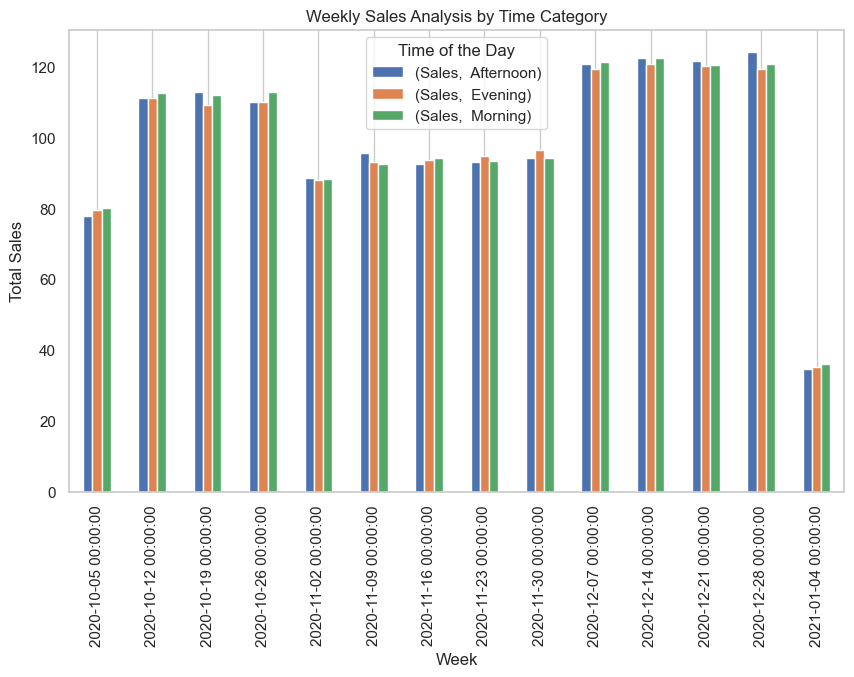

In [244]:
# Weekly analysis
weekly_sales = sales_data_with_binary.groupby('Time').resample('W-Mon', on='Date').sum()
weekly_sales[['Sales']].unstack(level=0).plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Sales Analysis by Time Category')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.legend(title='Time of the Day')
plt.show()

In [ ]:


#Recommendations:


#sales at the end of the year are higher, and in the state of Victoria in Australia, there are a lot of sales. There is no significant difference between gender sales and timing sales."

#Since sales tend to increase at the end of the year, consider implementing a seasonal marketing strategy to capitalize on this trend. Launch targeted promotions, discounts, or holiday-themed campaigns to attract more customers during peak sales periods.

# Given that Victoria, Australia, exhibits high sales volumes, allocate additional resources and marketing efforts to this region. Tailor marketing campaigns to the preferences and demographics of customers in Victoria to further drive sales.

#Explore customer segmentation based on demographics, purchasing behavior, or geographic location. Tailor product offerings, promotions, and marketing messages to different customer segments to enhance relevance and effectiveness.

